# Dataset
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# The imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Exploring the data

In [6]:
# Load the data
data = pd.read_csv('cardio_train.csv', sep=';')


data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [7]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Searching for the best model and plotting the cunfusion matrix

Model: Random Forest
Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6988
           1       0.71      0.71      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



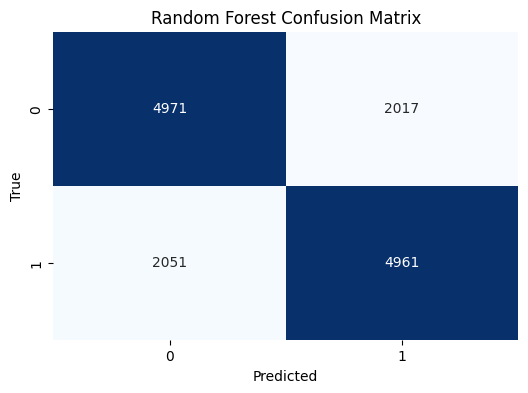

Model: Logistic Regression
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



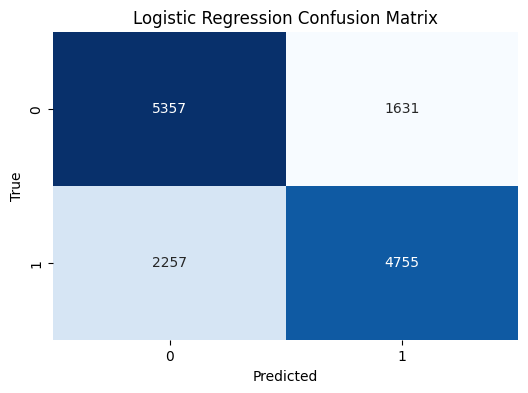

Model: SVM
Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



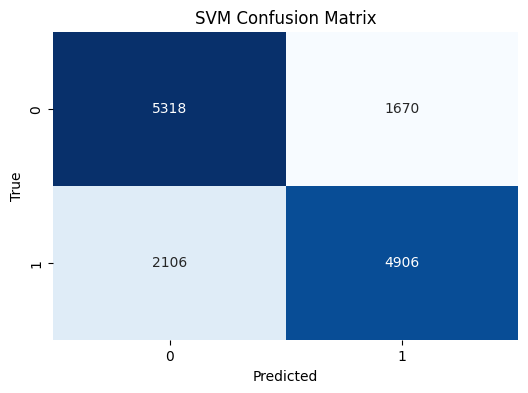

Model: k-NN
Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      6988
           1       0.66      0.63      0.65      7012

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



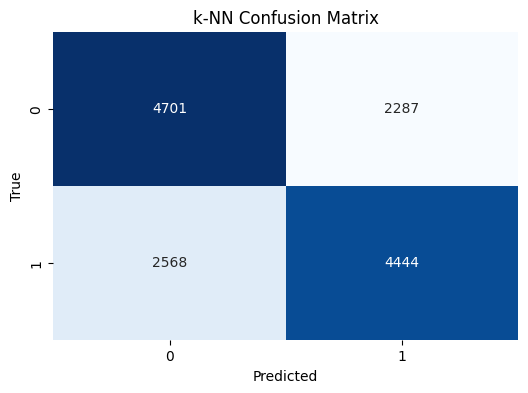

In [4]:
# Remove the 'id' column if it exists
if 'id' in data.columns:
    data = data.drop('id', axis=1)

# Convert 'age' from days to years
data['age'] = data['age'] // 365

# Preprocess the data
X = data.drop('cardio', axis=1)
y = data['cardio']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['cholesterol', 'gluc'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, name)




# Saving the model with highest accuracy, 
# the scaler and the feature names

In [5]:
# Save the RandomForest model and scaler and the features names
joblib.dump(models["SVM"], 'cardio_model.joblib')
joblib.dump(scaler, 'cardio_scaler.joblib')
joblib.dump(X.columns.tolist(), 'feature_names.joblib')

print("RandomForest model, scaler, and feature names saved successfully.")

RandomForest model, scaler, and feature names saved successfully.
